In [250]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [251]:
#Loading the dataset
data = pd.read_csv('data.csv')

In [252]:
#Descriptive statistics of data
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [253]:
#Getting total number of rows and columns in the data
print('(rows, columns) ->', data.shape)

(rows, columns) -> (6819, 96)


In [254]:
#Dropping two columns with very high correlation with other features
data.drop(columns=[' ROA(C) before interest and depreciation before interest', ' ROA(B) before interest and depreciation after tax'], inplace=True)

In [255]:
# Separate labels from features
labels = data.iloc[:, 0]
features = data.iloc[:, 1:]

X = data[data.columns[1:]]
y = data["Bankrupt?"]

In [256]:
# Compute the correlation matrix for the data
corr_matrix = data.corr().abs()

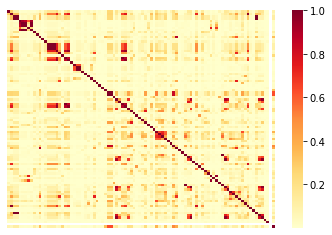

In [257]:
# Plot the correlation heatmap
sns.heatmap(corr_matrix, annot=False, xticklabels=False, yticklabels=False, cmap='YlOrRd')
plt.show()

In [258]:
#Printing the top 16 correlated features with 'Bankrupt?'
corr_matrix['Bankrupt?'].sort_values(ascending=False)[:16]

Bankrupt?                                    1.000000
 Net Income to Total Assets                  0.315457
 ROA(A) before interest and % after tax      0.282941
 Net worth/Assets                            0.250161
 Debt ratio %                                0.250161
 Persistent EPS in the Last Four Seasons     0.219560
 Retained Earnings to Total Assets           0.217779
 Net profit before tax/Paid-in capital       0.207857
 Per Share Net profit before tax (Yuan ¥)    0.201395
 Current Liability to Assets                 0.194494
 Working Capital to Total Assets             0.193083
 Net Income to Stockholder's Equity          0.180987
 Borrowing dependency                        0.176543
 Current Liability to Current Assets         0.171306
 Liability to Equity                         0.166812
 Net Value Per Share (A)                     0.165465
Name: Bankrupt?, dtype: float64

In [259]:
# Printing the least 16 correlated features with 'Bankrupt?'
corr_matrix['Bankrupt?'].sort_values(ascending=False)[-16:]

 Interest Coverage Ratio (Interest expense to EBIT)    0.005509
 Accounts Receivable Turnover                          0.004754
 Revenue Per Share (Yuan ¥)                            0.004692
 Quick Assets/Current Liability                        0.003823
 Working capitcal Turnover Rate                        0.002894
 Allocation rate per person                            0.002829
 Interest Expense Ratio                                0.002681
 Current Ratio                                         0.002211
 Inventory/Working Capital                             0.001906
 Inventory Turnover Rate (times)                       0.001376
 Inventory/Current Liability                           0.000822
 Long-term Liability to Current Assets                 0.000778
 Cash Flow to Sales                                    0.000479
 Realized Sales Gross Profit Growth Rate               0.000458
 Operating Profit Rate                                 0.000230
 Net Income Flag                        

In [260]:
corr_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

In [261]:
# Apply PCA and get explained variance ratios for top 14 features
pca = PCA()
features_pca = pca.fit_transform(features)
explained_variance_ratios = pca.explained_variance_ratio_
top_14_features_idx = np.argsort(explained_variance_ratios)[::-1][:14]
top_14_features = features.iloc[:, top_14_features_idx]
print(top_14_features.columns)

Index([' ROA(A) before interest and % after tax', ' Operating Gross Margin',
       ' Realized Sales Gross Margin', ' Operating Profit Rate',
       ' Pre-tax net Interest Rate', ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)'],
      dtype='object')


In [262]:
#Re-reading data and selecting important columns
data = pd.read_csv("data.csv")
data = data[["Bankrupt?",
" Net Income to Total Assets",
" ROA(A) before interest and % after tax",
" Net worth/Assets",
" Debt ratio %",
" Persistent EPS in the Last Four Seasons",
" Retained Earnings to Total Assets",
" Net profit before tax/Paid-in capital",
" Per Share Net profit before tax (Yuan ¥)",
" Current Liability to Assets",
" Working Capital to Total Assets",
" Net Income to Stockholder's Equity",
" Borrowing dependency",
" Current Liability to Current Assets",
" Liability to Equity",
" Net Value Per Share (A)"]]

In [263]:
data.head()

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥),Current Liability to Assets,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Current Liability to Current Assets,Liability to Equity,Net Value Per Share (A)
0,1,0.716845,0.424389,0.792424,0.207576,0.169141,0.903225,0.137757,0.138736,0.147308,0.672775,0.827890,0.390284,0.118250,0.290202,0.147950
1,1,0.795297,0.538214,0.828824,0.171176,0.208944,0.931065,0.168962,0.169918,0.056963,0.751111,0.839969,0.376760,0.047775,0.283846,0.182251
2,1,0.774670,0.499019,0.792484,0.207516,0.180581,0.909903,0.148036,0.142803,0.098162,0.829502,0.836774,0.379093,0.025346,0.290189,0.177911
3,1,0.739555,0.451265,0.848535,0.151465,0.193722,0.906902,0.147561,0.148603,0.098715,0.725754,0.834697,0.379743,0.067250,0.281721,0.154187
4,1,0.795016,0.538432,0.893491,0.106509,0.212537,0.913850,0.167461,0.168412,0.110195,0.751822,0.839973,0.375025,0.047725,0.278514,0.167502


<AxesSubplot:>

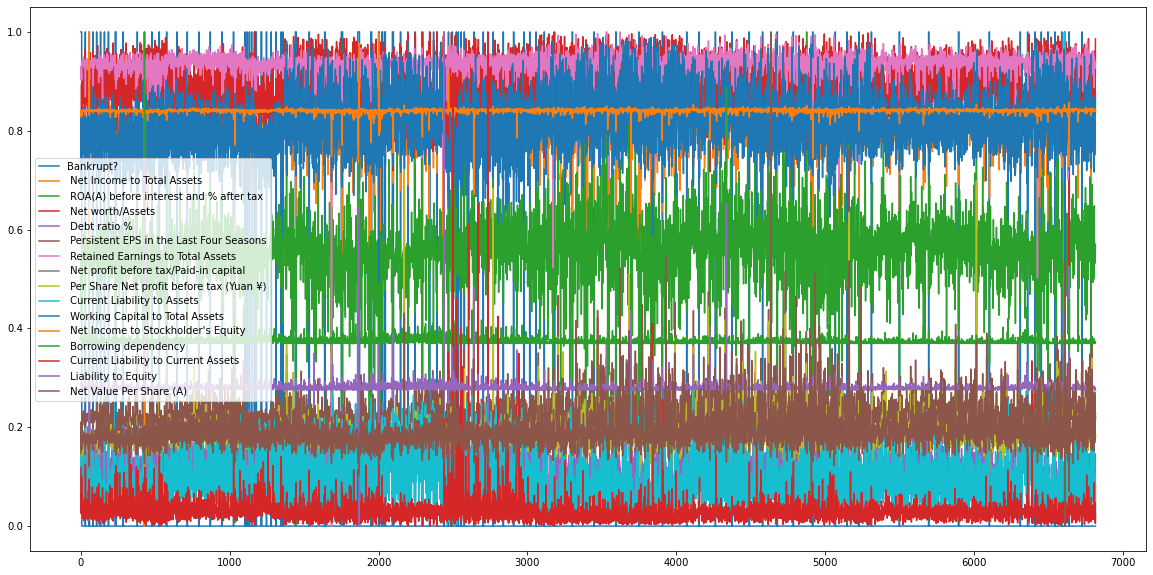

In [264]:
#Plot the data distribution
data.plot(figsize=(20, 10))

0    6599
1     220
Name: Bankrupt?, dtype: int64


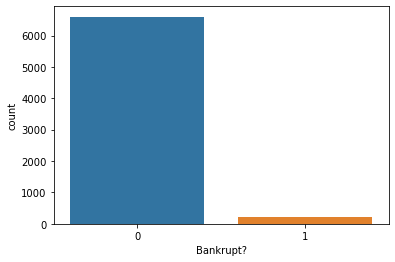

In [265]:
#Getting the count of each target class
print(data["Bankrupt?"].value_counts())
plt.figure()
sns.countplot(x = 'Bankrupt?',data = data )
plt.show()

In [266]:
features = data.columns[1:]
X = data[features]
y = data["Bankrupt?"]

In [267]:
#Performing oversampling using SMOTE to balance the dataset
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print('New balance of 1 and 0 classes (%):')
y_sm.value_counts()

New balance of 1 and 0 classes (%):


1    6599
0    6599
Name: Bankrupt?, dtype: int64

In [268]:
#Splitting the data into 80% training and 20% test sets 
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [269]:
# Train and evaluate Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print('Logistic Regression Precision:', precision_score(y_test, y_pred))
print('Logistic Regression Recall:', recall_score(y_test, y_pred))
print('Logistic Regression F1 score:', f1_score(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Logistic Regression Accuracy: 0.8632575757575758
Logistic Regression Precision: 0.8528752800597461
Logistic Regression Recall: 0.8744257274119449
Logistic Regression F1 score: 0.8635160680529301
Confusion matrix
 [[1137  197]
 [ 164 1142]]
True Positives(TP) =  1137
True Negatives(TN) =  1142
False Positives(FP) =  197
False Negatives(FN) =  164


In [270]:
# Train and evaluate Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print('Random Forest Precision:', precision_score(y_test, y_pred))
print('Random Forest Recall:', recall_score(y_test, y_pred))
print('Random Forest F1 score:', f1_score(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Random Forest Accuracy: 0.9696969696969697
Random Forest Precision: 0.9554234769687965
Random Forest Recall: 0.9846860643185299
Random Forest F1 score: 0.9698340874811463
Confusion matrix
 [[1274   60]
 [  20 1286]]
True Positives(TP) =  1274
True Negatives(TN) =  1286
False Positives(FP) =  60
False Negatives(FN) =  20


In [271]:
# Train and evaluate Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred))
print('SVM Precision:', precision_score(y_test, y_pred))
print('SVM Recall:', recall_score(y_test, y_pred))
print('SVM F1 score:', f1_score(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

SVM Accuracy: 0.8587121212121213
SVM Precision: 0.8334524660471766
SVM Recall: 0.892802450229709
SVM F1 score: 0.8621072088724585
Confusion matrix
 [[1101  233]
 [ 140 1166]]
True Positives(TP) =  1101
True Negatives(TN) =  1166
False Positives(FP) =  233
False Negatives(FN) =  140


In [272]:
# Train and evaluate Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print('Naïve Bayes Accuracy:', accuracy_score(y_test, y_pred))
print('Naïve Bayes Precision:', precision_score(y_test, y_pred))
print('Naïve Bayes Recall:', recall_score(y_test, y_pred))
print('Naïve Bayes F1 score:', f1_score(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Naïve Bayes Accuracy: 0.7738636363636363
Naïve Bayes Precision: 0.9146198830409357
Naïve Bayes Recall: 0.5987748851454824
Naïve Bayes F1 score: 0.7237390097177234
Confusion matrix
 [[1261   73]
 [ 524  782]]
True Positives(TP) =  1261
True Negatives(TN) =  782
False Positives(FP) =  73
False Negatives(FN) =  524


In [273]:
# Train and evaluate Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred))
print('Gradient Boosting Precision:', precision_score(y_test, y_pred))
print('Gradient Boosting Recall:', recall_score(y_test, y_pred))
print('Gradient Boosting F1 score:', f1_score(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Gradient Boosting Accuracy: 0.9079545454545455
Gradient Boosting Precision: 0.890521675238795
Gradient Boosting Recall: 0.9280245022970903
Gradient Boosting F1 score: 0.9088863892013498
Confusion matrix
 [[1185  149]
 [  94 1212]]
True Positives(TP) =  1185
True Negatives(TN) =  1212
False Positives(FP) =  149
False Negatives(FN) =  94


In [274]:
# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred))
print('Decision Tree Precision:', precision_score(y_test, y_pred))
print('Decision Tree Recall:', recall_score(y_test, y_pred))
print('Decision Tree F1 score:', f1_score(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Decision Tree Accuracy: 0.9397727272727273
Decision Tree Precision: 0.9251297257227576
Decision Tree Recall: 0.9555895865237366
Decision Tree F1 score: 0.9401129943502825
Confusion matrix
 [[1233  101]
 [  58 1248]]
True Positives(TP) =  1233
True Negatives(TN) =  1248
False Positives(FP) =  101
False Negatives(FN) =  58


In [275]:
# Train and evaluate K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, y_pred))
print('KNN Precision:', precision_score(y_test, y_pred))
print('KNN Recall:', recall_score(y_test, y_pred))
print('KNN F1 score:', f1_score(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

KNN Accuracy: 0.9390151515151515
KNN Precision: 0.8945554789800138
KNN Recall: 0.9938744257274119
KNN F1 score: 0.9416031918752267
Confusion matrix
 [[1181  153]
 [   8 1298]]
True Positives(TP) =  1181
True Negatives(TN) =  1298
False Positives(FP) =  153
False Negatives(FN) =  8


In [276]:
# Train and evaluate XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))
print('XGBoost Precision:', precision_score(y_test, y_pred))
print('XGBoost Recall:', recall_score(y_test, y_pred))
print('XGBoost F1 score:', f1_score(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

XGBoost Accuracy: 0.9662878787878788
XGBoost Precision: 0.9457875457875458
XGBoost Recall: 0.9885145482388974
XGBoost F1 score: 0.9666791463871209
Confusion matrix
 [[1260   74]
 [  15 1291]]
True Positives(TP) =  1260
True Negatives(TN) =  1291
False Positives(FP) =  74
False Negatives(FN) =  15


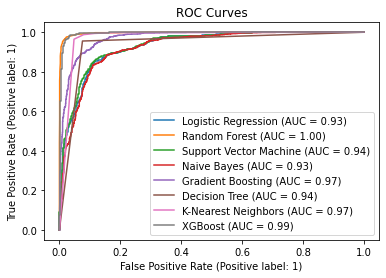

In [277]:
#Plotting ROC curves for all the classifiers
fig, ax = plt.subplots()
plot_roc_curve(lr, X_test, y_test, ax=ax, name='Logistic Regression')
plot_roc_curve(rf, X_test, y_test, ax=ax, name='Random Forest')
plot_roc_curve(svm, X_test, y_test, ax=ax, name='Support Vector Machine')
plot_roc_curve(nb, X_test, y_test, ax=ax, name='Naive Bayes')
plot_roc_curve(gb, X_test, y_test, ax=ax, name='Gradient Boosting')
plot_roc_curve(dt, X_test, y_test, ax=ax, name='Decision Tree')
plot_roc_curve(knn, X_test, y_test, ax=ax, name='K-Nearest Neighbors')
plot_roc_curve(xgb, X_test, y_test, ax=ax, name='XGBoost')
ax.set_title('ROC Curves')
plt.show()

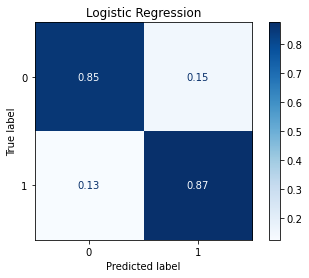

In [278]:
#Plot the confusion matrix for the logistic regression model
plot_confusion_matrix(lr, X_test, y_test, normalize='true', cmap='Blues')
plt.title("Logistic Regression")
plt.show()

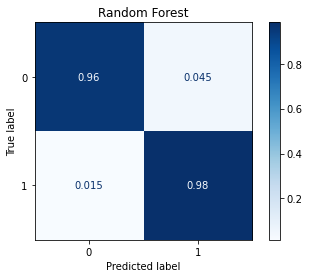

In [279]:
#Plot the confusion matrix for the Random forest model
plot_confusion_matrix(rf, X_test, y_test, normalize='true', cmap='Blues')
plt.title("Random Forest")
plt.show()

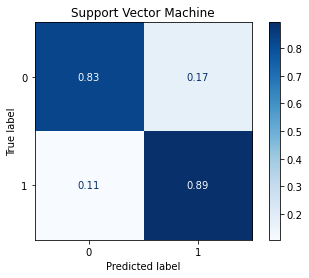

In [280]:
#Plot the confusion matrix for SVM model
plot_confusion_matrix(svm, X_test, y_test, normalize='true', cmap='Blues')
plt.title("Support Vector Machine")
plt.show()

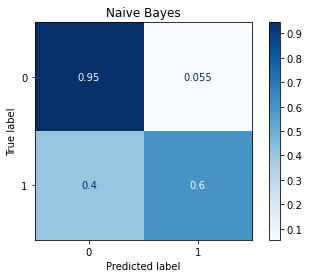

In [281]:
#Plot the confusion matrix for the Naive Bayes model
plot_confusion_matrix(nb, X_test, y_test, normalize='true', cmap='Blues')
plt.title("Naive Bayes")
plt.show()

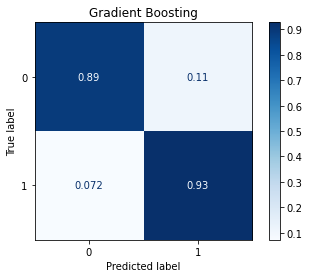

In [282]:
#Plot the confusion matrix for Gardient Boosting
plot_confusion_matrix(gb, X_test, y_test, normalize='true', cmap='Blues')
plt.title("Gradient Boosting")
plt.show()

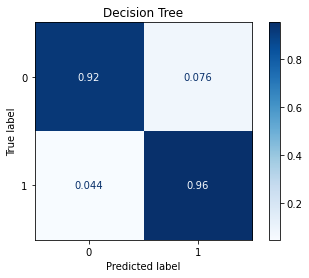

In [283]:
#Plot the confusion matrix for the Decision Tree
plot_confusion_matrix(dt, X_test, y_test, normalize='true', cmap='Blues')
plt.title("Decision Tree")
plt.show()

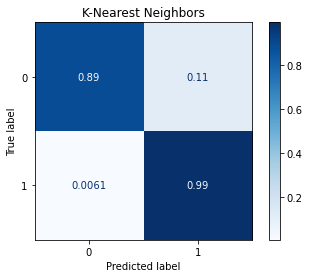

In [284]:
#Plot the confusion matrix for the K-Nearest Neighbors
plot_confusion_matrix(knn, X_test, y_test, normalize='true', cmap='Blues')
plt.title("K-Nearest Neighbors")
plt.show()

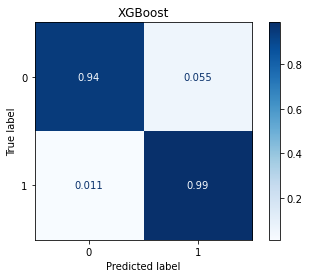

In [285]:
#Plot the confusion matrix for the XGBoost
plot_confusion_matrix(xgb, X_test, y_test, normalize='true', cmap='Blues')
plt.title("XGBoost")
plt.show()

In [286]:
# Running for 70 - 30 split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [288]:
# Train and evaluate Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print('Logistic Regression Precision:', precision_score(y_test, y_pred))
print('Logistic Regression Recall:', recall_score(y_test, y_pred))
print('Logistic Regression F1 score:', f1_score(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Logistic Regression Accuracy: 0.8641414141414141
Logistic Regression Precision: 0.853719420868697
Logistic Regression Recall: 0.8746803069053708
Logistic Regression F1 score: 0.8640727640222334
Confusion matrix
 [[1712  293]
 [ 245 1710]]
True Positives(TP) =  1712
True Negatives(TN) =  1710
False Positives(FP) =  293
False Negatives(FN) =  245
